# 動画処理・動画解析

## 背景差分
- 背景差分というのは(今のフレーム) - (背景フレーム)　の引き算をする

<u>動いている物体(今のフレーム) - 背景フレーム = 差分（分離できる）</u>

#### そうすることによって背景と異なる所だけを抽出できる
- 背景差分により、背景かそれ以外かを分離できる

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
cv2.namedWindow("img", cv2.WINDOW_NORMAL)  # 1
cv2.resizeWindow("img", 1200, 800)
cap = cv2.VideoCapture("data/movie/Pepole.mp4")  # 2
ret, frame = cap.read()  # 3
h, w, ch = frame.shape  # 4
frame_back = np.zeros((h, w, ch), dtype=np.float32)  # 5
while True:
    ret, frame = cap.read()  # 6
    if ret == False:
        break
    frame_diff = cv2.absdiff(frame.astype(np.float32), frame_back)  # 7
    cv2.accumulateWeighted(frame, frame_back, 0.03)  # 8
    cv2.imshow("img", frame_diff.astype(np.uint8)) # 9
    if cv2.waitKey(10) == 27:  # 10
        break
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

### 背景差分後　の video image

([], [])

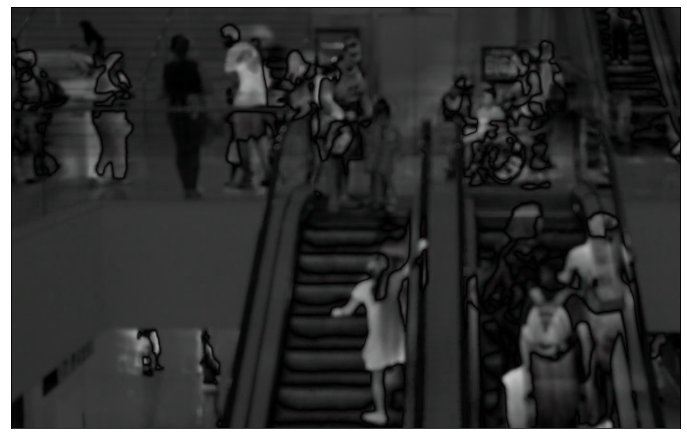

In [22]:
fn = r'static/bg_diff/diff.png'
img = cv2.imread(fn)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

([], [])

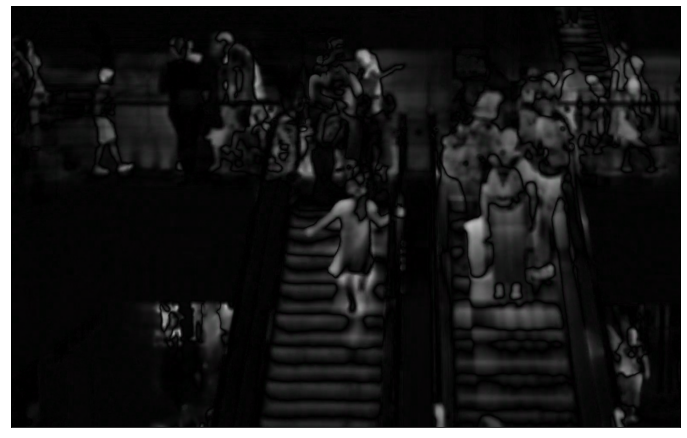

In [23]:
fn1 = r'static/bg_diff/diff1.png'
img1 = cv2.imread(fn1)
plt.figure(figsize=(12, 8))
plt.imshow(img1)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

([], [])

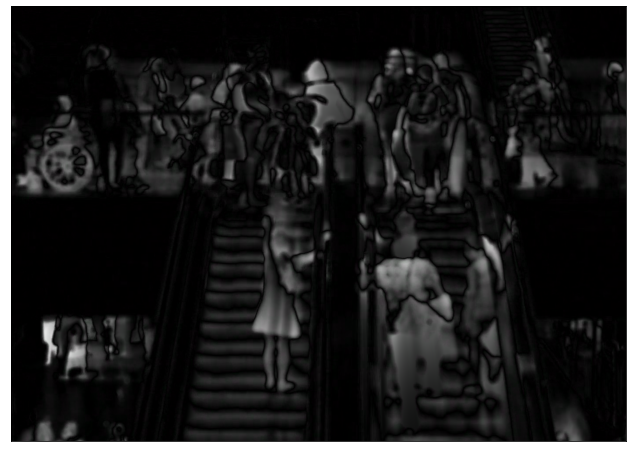

In [24]:
fn2 = r'static/bg_diff/diff2.png'
img2 = cv2.imread(fn2)
plt.figure(figsize=(12, 8))
plt.imshow(img2)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

- 最初は明るかったが、accumulateWeighted によって重みづけされていく
- 少し前の画像と今の画像で差を取っているので動いている所だけが白く映し出される

#### 動いているところが白く強調されてくるイメージ

### 背景差分　code

1. window size が大きので resize する
2. video 読み込み
3. １ frame だけ取り出す
4. 高さ、幅、チャンネル数の情報を抽出
5. 後々差分を取るときに float32 型でないといけないので
6. １ frame だけ読み込み、最後まで読み込んでしまったら break する
7. ここで差分をとる : absdiff 関数は、差をとって絶対値を取る。float32型でないと受け付けないので変換
    - この時点ではまだ真っ黒の画像で差をとってもそのままの画像が表示される
8. frame_back を frame に近づけていくという工程をする : 0.03 = 3% -> ３％づつ混ぜていく
    - frame_back に frame を 3% づつ混ぜていくことによって、真っ黒な背景に　3%　づつ前の画像の情報が入ってくる
    - その中で現在の画像との差分を取ることによって、ズレているので移動している部分が白っぽく映る
9. 型の変換と表示
10. esc で break
    - あとは default の記述
    - 全てのウィンドウを閉じて、メモリの解放